In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('updated_NSCH_Vision_Health_Data.csv')

# Display the first few rows of the dataset
print(df.head())

   YearStart  YearEnd LocationAbbr LocationDesc Datasource  \
0       2016     2017           US     National       NSCH   
1       2016     2017           US     National       NSCH   
2       2016     2017           OH         Ohio       NSCH   
3       2016     2017           TN    Tennessee       NSCH   
4       2016     2017           UT         Utah       NSCH   

                 Topic       Category  \
0  Service Utilization           Need   
1  Service Utilization           Need   
2  Service Utilization      Screening   
3  Service Utilization  Provider Type   
4  Service Utilization           Need   

                                            Question  \
0  Percentage of children who needed vision care ...   
1  Percentage of children who needed vision care ...   
2  Percentage of children who have ever had their...   
3  Percentage of children who have ever had their...   
4  Percentage of children who needed vision care ...   

                       Response         Age

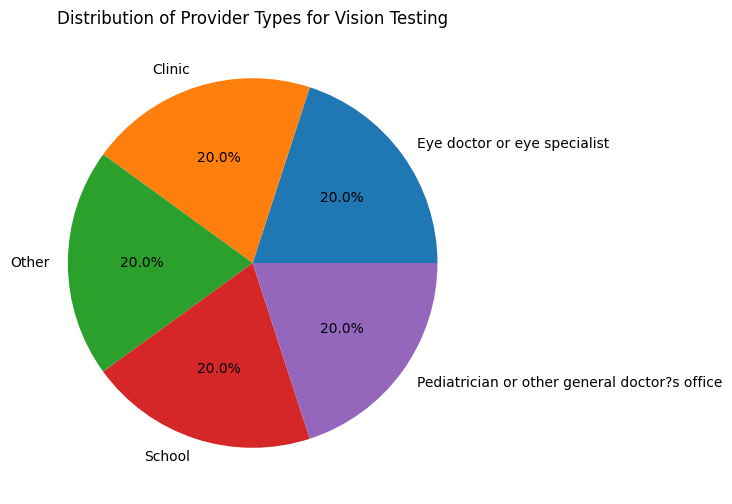

In [28]:
# Analyze provider types for vision testing
provider_types = df[df['Category'] == 'Provider Type']['Response'].value_counts()
plt.figure(figsize=(10, 6))
provider_types.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Provider Types for Vision Testing')
plt.ylabel('')
plt.show()

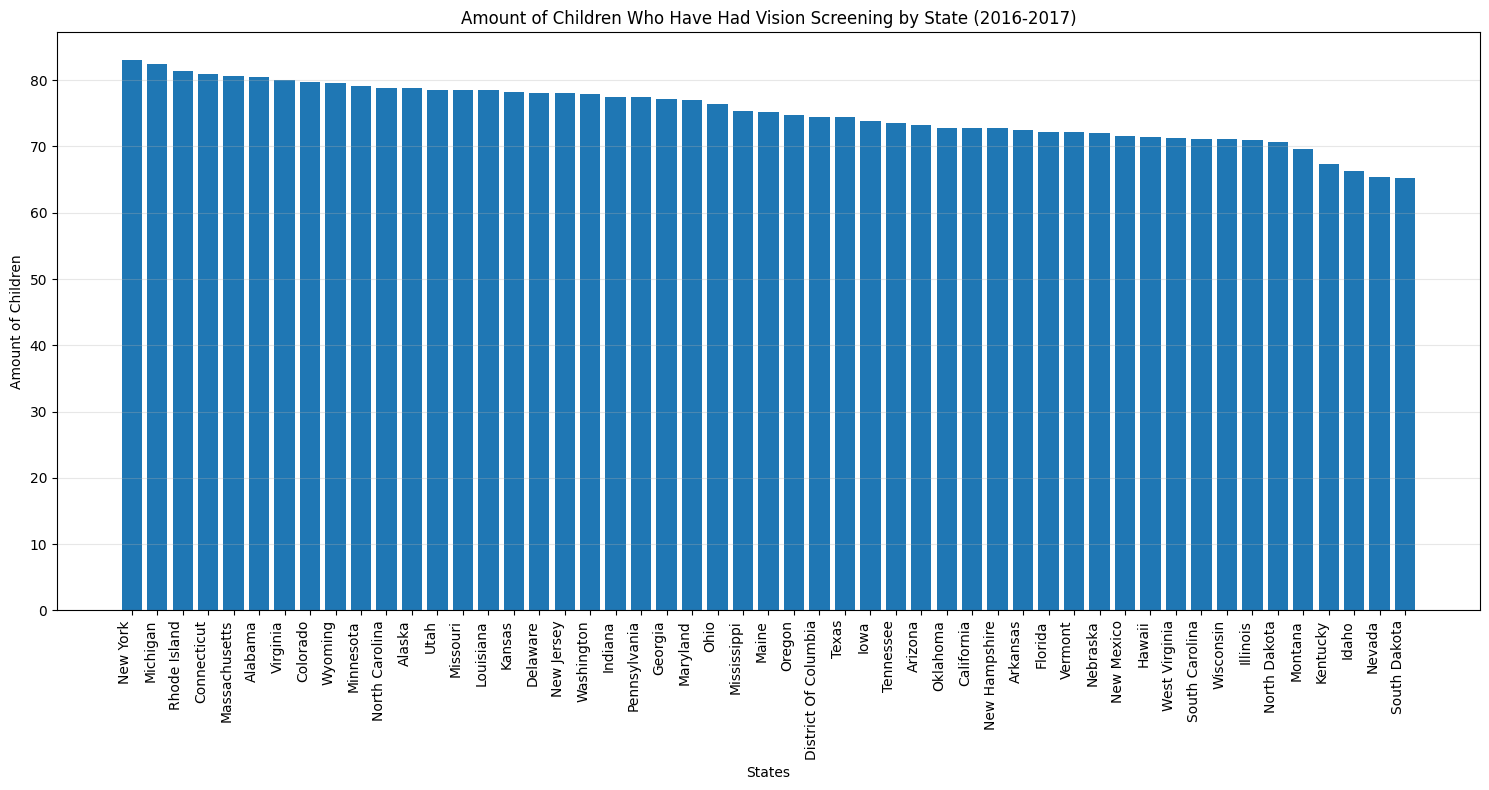

In [40]:
# Filter data for vision screening
screening_data = df[(df['Topic'] == 'Service Utilization') &
                    (df['Category'] == 'Screening') &
                    (df['Response'] == 'Yes') &
                    (df['LocationDesc'] != 'National')]

# Sort the data by Amount in descending order
screening_data = screening_data.sort_values('Data_Value', ascending=False)

# Create the bar chart
plt.figure(figsize=(15, 8))
bars = plt.bar(screening_data['LocationDesc'], screening_data['Data_Value'])
plt.title('Amount of Children Who Have Had Vision Screening by State (2016-2017)')
plt.xlabel('States')
plt.ylabel('Amount of Children')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

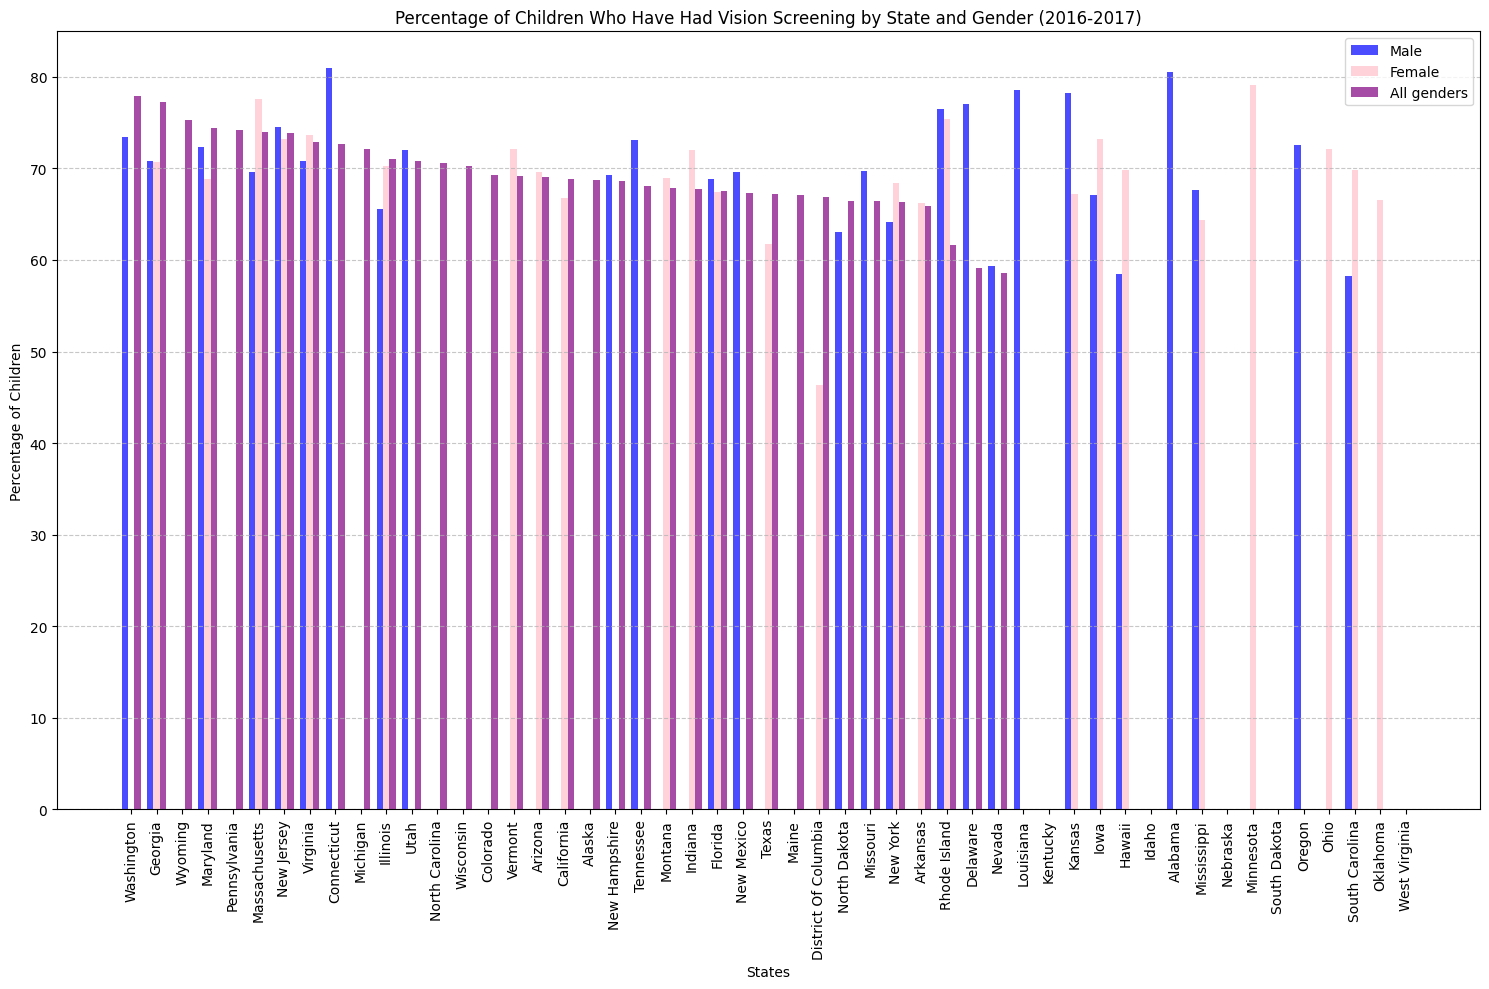

In [36]:
screening_data = df[(df['Topic'] == 'Service Utilization') &
                    (df['Category'] == 'Screening') &
                    (df['Response'] == 'Yes') &
                    (df['LocationDesc'] != 'National') &
                    (df['Gender'].isin(['Male', 'Female', 'All genders']))]

# Create a pivot table
pivot_data = screening_data.pivot_table(values='Data_Value',
                                        index='LocationDesc',
                                        columns='Gender',
                                        aggfunc='first')

# Sort the data by 'All genders' column
pivot_data = pivot_data.sort_values('All genders', ascending=False)

# Create the bar chart
fig, ax = plt.subplots(figsize=(15, 10))
bar_width = 0.25
index = range(len(pivot_data.index))

ax.bar(index, pivot_data['Male'], bar_width, label='Male', color='blue', alpha=0.7)
ax.bar([i + bar_width for i in index], pivot_data['Female'], bar_width, label='Female', color='pink', alpha=0.7)
ax.bar([i + 2 * bar_width for i in index], pivot_data['All genders'], bar_width, label='All genders', color='purple', alpha=0.7)
ax.set_xlabel('States')
ax.set_ylabel('Percentage of Children')
ax.set_title('Percentage of Children Who Have Had Vision Screening by State and Gender (2016-2017)')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(pivot_data.index, rotation=90)

ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()